# 常用的 DataFrame 操作
* merge / transform
* subset
* groupby

# [作業目標]
- 練習填入對應的欄位資料或公式, 完成題目的要求 

# [作業重點]
- 填入適當的輸入資料, 讓後面的程式顯示題目要求的結果 (Hint: 填入對應區間或欄位即可, In[4]~In[6], Out[4]~In[6])
- 填入z轉換的計算方式, 完成轉換後的數值 (Hint: 參照標準化公式, In[7])

In [21]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# 設定 data_path
dir_data = '../data/'

In [23]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ../data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 作業
1. 請將 app_train 中的 CNT_CHILDREN 依照下列規則分為四組，並將其結果在原本的 dataframe 命名為 CNT_CHILDREN_GROUP
    * 0 個小孩
    * 有 1 - 2 個小孩
    * 有 3 - 5 個小孩
    * 有超過 5 個小孩

2. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，列出各組的平均 AMT_INCOME_TOTAL，並繪製 baxplot
3. 請根據 CNT_CHILDREN_GROUP 以及 TARGET，對 AMT_INCOME_TOTAL 計算 [Z 轉換](https://en.wikipedia.org/wiki/Standard_score) 後的分數

In [24]:
print(app_train['CNT_CHILDREN'].max())
print(app_train['CNT_CHILDREN'].count())



19
307511


In [25]:
#1
"""
Your code here
"""
cut_rule = [-1,1,3,6,app_train['CNT_CHILDREN'].max()+1] #cut函数是利用數值區間將數值分類，qcut則是用分位數。

app_train['CNT_CHILDREN_GROUP'] = pd.cut(app_train['CNT_CHILDREN'].values, cut_rule, include_lowest=True)
app_train['CNT_CHILDREN_GROUP'].value_counts()

(-1.001, 1.0]    276490
(1.0, 3.0]        30466
(3.0, 6.0]          534
(6.0, 20.0]          21
Name: CNT_CHILDREN_GROUP, dtype: int64

In [26]:
#2-1
"""
Your code here
"""
grp = ['CNT_CHILDREN_GROUP', 'TARGET']

grouped_df = app_train.groupby(grp)['AMT_INCOME_TOTAL']
grouped_df.mean()

CNT_CHILDREN_GROUP  TARGET
(-1.001, 1.0]       0         168554.452269
                    1         166133.317001
(1.0, 3.0]          0         173824.963059
                    1         161627.570234
(3.0, 6.0]          0         173158.841202
                    1         150114.705882
(6.0, 20.0]         0         134500.000000
                    1         255000.000000
Name: AMT_INCOME_TOTAL, dtype: float64

       Col1      Col2      Col3      Col4
0  0.471435 -1.190976  1.432707 -0.312652
1 -0.720589  0.887163  0.859588 -0.636524
2  0.015696 -2.242685  1.150036  0.991946
3  0.953324 -2.021255 -0.334077  0.002118
4  0.405453  0.289092  1.321158 -1.546906


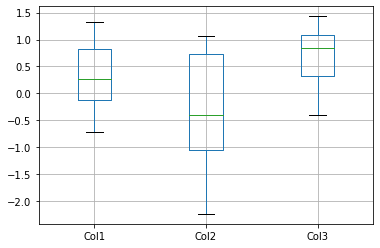

In [27]:
##練習 BOXPLOT 
np.random.seed(1234)
df = pd.DataFrame(np.random.randn(10,4)
                  ,columns=['Col1', 'Col2', 'Col3', 'Col4'])
print(df.head())
boxplot = df.boxplot(column=['Col1', 'Col2', 'Col3'])

In [28]:
print(type(grouped_df))
grouped_df.head()

<class 'pandas.core.groupby.generic.SeriesGroupBy'>


0         202500.0
1         270000.0
2          67500.0
3         135000.0
4         121500.0
5          99000.0
24        135000.0
26        112500.0
36        198000.0
40        202500.0
42        135000.0
53        225000.0
70        180000.0
72        225000.0
81         81000.0
180       180000.0
471       180000.0
563       180000.0
699       135000.0
866       135000.0
1133      121500.0
1721      112500.0
2348       67500.0
2666       45000.0
3079       85500.0
3448      135000.0
4062      180000.0
4422      225000.0
8362       81000.0
9712      162000.0
10479     180000.0
12615     112500.0
23881     180000.0
26195     180000.0
34545     315000.0
80948     337500.0
116428    117000.0
276768    270000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [29]:
# 取 CNT_CHILDREN 為 0 的
sub_df1 = app_train[app_train['CNT_CHILDREN'] == 0]['AMT_INCOME_TOTAL']
print(sub_df1.head())
print(sub_df1.count())

0    202500.0
1    270000.0
2     67500.0
3    135000.0
4    121500.0
Name: AMT_INCOME_TOTAL, dtype: float64
215371


In [30]:
sub_df2 = app_train[app_train['CNT_CHILDREN'] == 1 ]['AMT_INCOME_TOTAL']
print(sub_df2.head())
print(sub_df2.count())

6     171000.0
10    112500.0
13    225000.0
17     81000.0
19     90000.0
Name: AMT_INCOME_TOTAL, dtype: float64
61119


In [39]:
#sub1=app_train['CNT_CHILDREN'] > 2
#sub2=app_train['CNT_CHILDREN'] <= 5
#sub_df3 = app_train[(sub1 & sub2)]['AMT_INCOME_TOTAL']
sub_df3 = app_train[((app_train['CNT_CHILDREN'] > 2) & (app_train['CNT_CHILDREN'] <= 5))]['AMT_INCOME_TOTAL']
print(sub_df3.head())
print(sub_df3.count())

91     171000.0
92     135000.0
144     58500.0
180    180000.0
182    225000.0
Name: AMT_INCOME_TOTAL, dtype: float64
4230


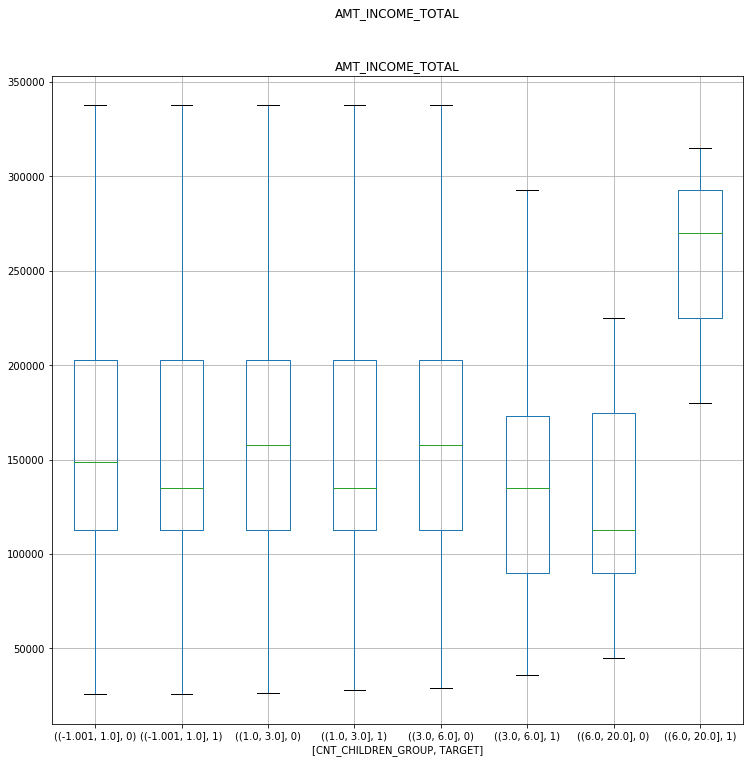

In [32]:
#2-2
"""
Your code here
"""
plt_column = ['AMT_INCOME_TOTAL']
plt_by = ['CNT_CHILDREN_GROUP', 'TARGET']


app_train.boxplot(column=plt_column, by = plt_by, showfliers = False, figsize=(12,12))
plt.suptitle('AMT_INCOME_TOTAL')
plt.show()

In [33]:
#3
"""
Your code here
"""
app_train['AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET'] = grouped_df.apply(lambda x:(x - x.min()) / x.std())

app_train[['AMT_INCOME_TOTAL','AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET']].head()

,AMT_INCOME_TOTAL,AMT_INCOME_TOTAL_Z_BY_CHILDREN_GRP-TARGET
0,202500.0,0.223474
1,270000.0,2.317505
2,67500.0,0.396921
3,135000.0,1.037115
4,121500.0,0.909076
